### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


In [1]:
print("hello")

hello


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [2]:
# Write Your Code Below
# Import all libraries in this cell
#import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Perform web scrapping
#import requests
from bs4 import BeautifulSoup



response = requests.get("https://covid19.ncdc.gov.ng/")
contents = response.text
    
Soup = BeautifulSoup(contents, "html.parser")

In [26]:
#accessing and inspecting the web content
web_contents = Soup.find(name='table', id ='custom1')
web_contents

<table id="custom1">
<thead>
<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<td>
Lagos
</td>
<td>104,231
</td>
<td>1,088
</td>
<td>102,372
</td>
<td>771
</td>
</tr>
<tr>
<td>
FCT
</td>
<td>29,530
</td>
<td>12
</td>
<td>29,269
</td>
<td>249
</td>
</tr>
<tr>
<td>
Rivers
</td>
<td>18,108
</td>
<td>-3
</td>
<td>17,956
</td>
<td>155
</td>
</tr>
<tr>
<td>
Kaduna
</td>
<td>11,630
</td>
<td>1
</td>
<td>11,540
</td>
<td>89
</td>
</tr>
<tr>
<td>
Oyo
</td>
<td>10,352
</td>
<td>0
</td>
<td>10,150
</td>
<td>202
</td>
</tr>
<tr>
<td>
 Plateau
</td>
<td>10,344
</td>
<td>0
</td>
<td>10,269
</td>
<td>75
</td>
</tr>
<tr>
<td>
Edo
</td>
<td>7,928
</td>
<td>0
</td>
<td>7,606
</td>
<td>322
</td>
</tr>
<tr>
<td>
Delta
</td>
<td>5,856
</td>
<td>574
</td>
<td>5,170
</td>
<td>112
</td>
</tr>
<tr>
<td>
Ogun
</td>
<td>5,810
</td>
<td>11
</td>
<td>5,717
</td>
<td>82
</td>
</tr>
<tr>

In [27]:
#extracting the column names
head_list = []
Soup = BeautifulSoup(contents, "html.parser")
head = Soup.find_all(name = "th")

#head_list.append([i.get_text() for i in head])
for i in head:
    head_list.append(i.get_text())
    
head_list

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [28]:
#extracting the column contents
table = Soup.find('table')
table_rows = table.find_all('tr')

contents = []
for tr in table_rows:
    td = tr.find_all('td')
    #row = [tr.text.strip() for tr in td if tr.text.strip()]
    row = [tr.text.strip() for tr in td]
    if row:
        res.append(row)

#construction of a dataframe
df = pd.DataFrame(contents, columns=head_list)
df.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,231","1,088","102,372",771
1,FCT,"29,530",12,"29,269",249


In [29]:
#checking information of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [3]:
#[Write Your Code Here]

def build_dataframe(file):
    #'''This function saves data from John Hopkins repository to DataFrame '''
    df = pd.read_csv(file)
    df = pd.DataFrame(df)
    return df

In [4]:
#filepath
Confirmed = "C:/Users/Yusuf/Desktop/Portfolio Project/cov project/time_series_covid19_confirmed_global.csv"
Recovered = "C:/Users/Yusuf/Desktop/Portfolio Project/cov project/time_series_covid19_recovered_global.csv"
Death = "C:/Users/Yusuf/Desktop/Portfolio Project/cov project/time_series_covid19_deaths_global.csv"

In [5]:
#constructing a dataframe
Confirmed_cases = build_dataframe(Confirmed)
Confirmed_cases.head(2)


,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#constructing a dataframe
Death_cases = build_dataframe(Death)
Death_cases.head(2)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#constructing a dataframe
Recovered = pd.read_csv('C:/Users/Yusuf/Desktop/covv2/time_series_covid19_recovered_global.csv')
Recovered.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/1/22,11/2/22,11/3/22,11/4/22,11/5/22,11/6/22,11/7/22,11/8/22,11/9/22,11/10/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [8]:
#Save eternal data to dataframe
def external_data(file):
    x = pd.read_csv(file)
    y = pd.DataFrame(x)
    
    return y

In [9]:
GDP = external_data("C:/Users/Yusuf/Desktop/Portfolio Project/Nigeria-COVID-19-Data-Analysis-Using-Python-main/RealGDP.csv")
Budget = external_data("C:/Users/Yusuf/Desktop/Portfolio Project/Nigeria-COVID-19-Data-Analysis-Using-Python-main/Budget data.csv")
Covid_External = external_data("C:/Users/Yusuf/Desktop/Portfolio Project/Nigeria-COVID-19-Data-Analysis-Using-Python-main/covid_external.csv")

In [10]:
Covid_External

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [11]:
#Obtaining basic information
def basic_info(dataframe):
    head = dataframe.head(3)
    print("\n")
    info = dataframe.info()
    print("\n")
    dataframe.shape
    
    
    return head, info
    

### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [38]:
df.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,231","1,088","102,372",771
1,FCT,"29,530",12,"29,269",249


In [50]:
#Clean the scraped data function
def clean_scrape_data(columnname):
    #Remove comma(,) in numerical data
    df[columnname] = df[columnname].str.replace(',', '')
    
    #Convert to appropriate data type.
    df[columnname] = df[columnname].astype('int')
    
    return df[columnname]

In [ ]:
#Clean the scraped data
df['No. of Cases (Lab Confirmed)'] = clean_scrape_data('No. of Cases (Lab Confirmed)')
df['No. Discharged'] = clean_scrape_data('No. Discharged')
df['No. of Deaths'] = clean_scrape_data('No. of Deaths')
df['No. of Cases (on admission)'] = clean_scrape_data('No. of Cases (on admission)')

In [41]:
df

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104231,1088,102372,771
1,FCT,29530,12,29269,249
2,Rivers,18108,-3,17956,155
3,Kaduna,11630,1,11540,89
4,Oyo,10352,0,10150,202
5,Plateau,10344,0,10269,75
6,Edo,7928,0,7606,322
7,Delta,5856,574,5170,112
8,Ogun,5810,11,5717,82
9,Kano,5386,-1,5260,127


In [12]:
#clean global data 1
def clean_global_files(file):
    Clean_file = file.dropna(axis=0)
    Clean_file = Clean_file.rename(columns = {"Country/Region":"Date"})
    Clean_file["Date"] = pd.to_datetime(Clean_file["Date"])
    
    
    return Clean_file

In [13]:
Confirmed_cases = clean_global_files(Confirmed_cases)
Confirmed_cases.head(2)

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#clean global data 2
def clean_global_files2(file):
    Clean_file = file.dropna(axis=0)
    Clean_file = file.drop(["Lat", "Long", "Province/State"], axis=1)
    Clean_file = Clean_file.rename(columns = {"Country/Region":"Date"})
    
    Clean_file = pd.pivot_table(round(Clean_file, 2),
    #values=[data.columns],
    #index=["Country/Region"],
    columns=["Date"]
    )
    
    
    return Clean_file

In [15]:
Recovered_cases = clean_global_files2(Recovered)
Recovered_cases.head(2)


Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/1/21,41727.0,33634.0,67395.0,7463.0,11146.0,0.0,148.0,1426676.0,143355.0,2821.625,...,13990.0,75244.0,1.0,107901.0,1325.0,118926.0,0.0,1396.0,18773.0,11347.0
1/1/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Death_cases = clean_global_files(Death_cases)
Death_cases.head(2)

,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#extracting Nigeria data from global files
def extract_Nigeria(file):
    Data = file['Nigeria']
    #Daily_Confirm = file['Nigeria']
    #Nigeria_Daily_Recovery = file[Nigeria]
    
    return Data

In [18]:
Nigeria_Daily_Confirm = extract_Nigeria(Confirmed_cases)
Nigeria_Daily_Confirm

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
1019    0.0
1020    0.0
1021    0.0
1022    0.0
1023    0.0
Name: Nigeria, Length: 1023, dtype: float64

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [19]:
#Function for getting DataFrame for Daily Confirmed Cases in Nigeria
def Global_data(file):
    Data = file[['Date', 'Nigeria']]
    
    
    return Data

In [20]:
#getting DataFrame for Daily Confirmed Cases in Nigeria
Confirmed_Cases_in_Nigeria = Global_data(Confirmed_cases)
Confirmed_Cases_in_Nigeria.head()

,Date,Nigeria
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [21]:
Recovered_cases.head(2)

Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/1/21,41727.0,33634.0,67395.0,7463.0,11146.0,0.0,148.0,1426676.0,143355.0,2821.625,...,13990.0,75244.0,1.0,107901.0,1325.0,118926.0,0.0,1396.0,18773.0,11347.0
1/1/22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#getting DataFrame for Daily Recovered Cases in Nigeria
Recovered_Cases_in_Nigeria =  pd.DataFrame({
    "Nigeria" : Recovered_cases['Nigeria']
    })
Recovered_Cases_in_Nigeria.index = Recovered_Cases_in_Nigeria.index.rename('Date')
Recovered_Cases_in_Nigeria.head()

,Nigeria
Date,
1/1/21,74373.0
1/1/22,0.0
1/10/21,80030.0
1/10/22,0.0
1/11/21,80491.0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [23]:
Death_Cases_in_Nigeria = Global_data(Death_cases)
Death_Cases_in_Nigeria.head()

,Date,Nigeria
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [ ]:
Top_10= df[['States Affected', 'No. of Cases (Lab Confirmed)']].head(10)
Top_10

Lagos state has the highest number of covid cases, leading the second highest by FCT by 71% while Ogun and Kano are the 9th and 10th respectively.

Text(0.5, 1.0, 'Top 10 Covid-19 Confirmed Cases in Nigeria')

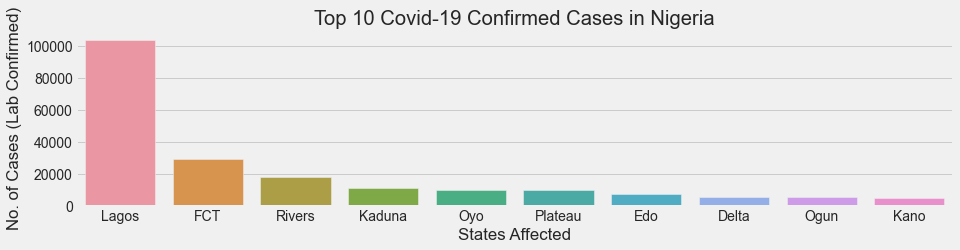

In [52]:
fig = plt.figure(figsize=(14,3))
sns.barplot(data=Top_10, x='States Affected', y='No. of Cases (Lab Confirmed)');
#plt.bar(Top_10['States Affected'], Top_10['No. of Cases (Lab Confirmed)'])
plt.xlabel('States Affected')
plt.ylabel('No. of Cases (Lab Confirmed)')
plt.title('Top 10 Covid-19 Confirmed Cases in Nigeria')

Lagos state has the highest number of covid cases, leading the second highest by FCT by 71% while Ogun and Kano are the 9th and 10th respectively.

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [53]:
df.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,104231,1088,102372,771
1,FCT,29530,12,29269,249


In [54]:
#Top_10= df[['States Affected', 'No. Discharged']].sort_values(by=ascending=False).head(10)
Top_10= df[['States Affected', 'No. Discharged']].sort_values(by='No. Discharged', ascending = False).head(10)
Top_10

,States Affected,No. Discharged
0,Lagos,102372
1,FCT,29269
2,Rivers,17956
3,Kaduna,11540
5,Plateau,10269
4,Oyo,10150
6,Edo,7606
8,Ogun,5717
9,Kano,5260
7,Delta,5170


Text(0.5, 1.0, 'Top 10 Covid-19 Discharged Cases in Nigeria')

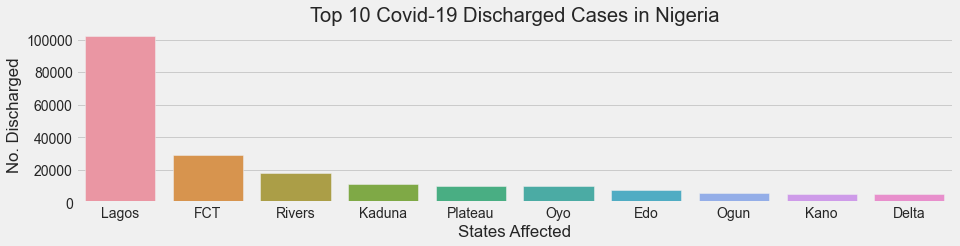

In [55]:
fig = plt.figure(figsize=(14,3))
#plt.bar(Top_10['States Affected'], Top_10['No. Discharged'])
sns.barplot(data=Top_10, x='States Affected', y='No. Discharged');
plt.xlabel('States Affected')
plt.ylabel('No. Discharged')
plt.title('Top 10 Covid-19 Discharged Cases in Nigeria')

Lagos state has the highest number of discharged cases, leading the second highest FCT by 71% while Kano and Delta are the 9th and 10th state with discharched cases respectively.

TODO D - Plot the top 10 Death cases

In [56]:
Top_10 = df[['States Affected', 'No. of Deaths']].sort_values(by='No. of Deaths', ascending = False).head(10)
Top_10

,States Affected,No. of Deaths
0,Lagos,771
6,Edo,322
1,FCT,249
4,Oyo,202
2,Rivers,155
9,Kano,127
7,Delta,112
10,Ondo,109
14,Osun,92
3,Kaduna,89


Text(0.5, 1.0, 'Top 10 Covid-19 Death Cases in Nigeria')

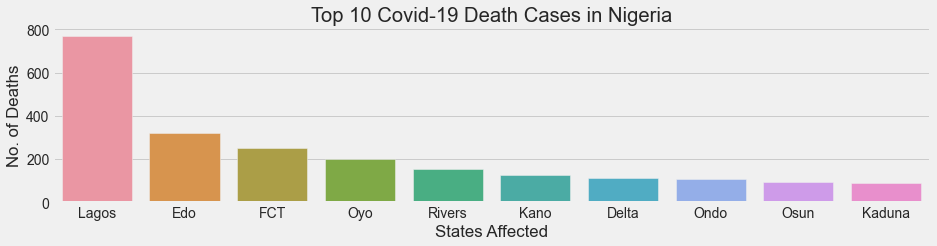

In [57]:
fig = plt.figure(figsize=(14,3))
sns.barplot(data=Top_10, x='States Affected', y='No. of Deaths');
#plt.bar(Top_10['States Affected'], Top_10['No. of Deaths'])
plt.xlabel('States Affected')
plt.ylabel('No. of Deaths')
plt.title('Top 10 Covid-19 Death Cases in Nigeria')



Lagos state has the highest number of death cases of covid patients, leading the second highest Edo state by 58% while Osun and Kaduna state are the 9th and 10th state with death cases of covid patients.

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [58]:
TDC, TDD = Confirmed_Cases_in_Nigeria.sum(), Death_Cases_in_Nigeria.sum()

In [59]:
Confirmed_Cases_in_Nigeria

,Date,Nigeria
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
1019,2022-11-06,0.0
1020,2022-11-07,0.0
1021,2022-11-08,0.0
1022,2022-11-09,0.0


In [24]:
Confirmed_Cases_in_Nigeria.max()

Date       2022-11-10 00:00:00
Nigeria                 6158.0
dtype: object

Text(0, 0.5, 'No of Confirmed Cases')

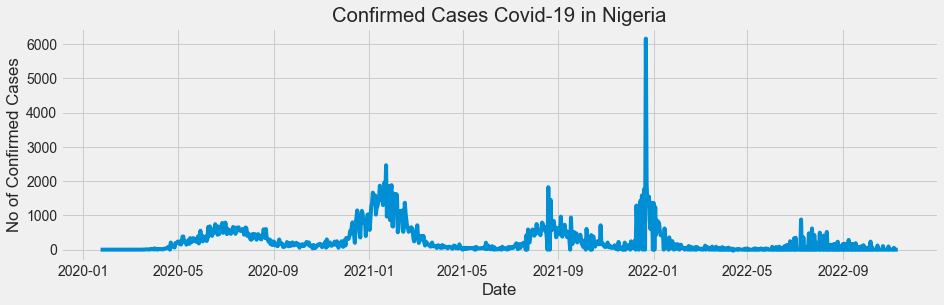

In [25]:
fig = plt.figure(figsize=(14,4))
#sns.lineplot(data=Confirmed_Cases_in_Nigeria, x='Date', y='Nigeria');
p = sns.lineplot(data=Confirmed_Cases_in_Nigeria, x='Date', y='Nigeria');
plt.title('Confirmed Cases Covid-19 in Nigeria')
p.set_xlabel('Date')
p.set_ylabel('No of Confirmed Cases')

In [26]:
Death_Cases_in_Nigeria.max()

Date       2022-11-10 00:00:00
Nigeria                   93.0
dtype: object

Text(0.5, 1.0, 'Death Cases in Nigeria')

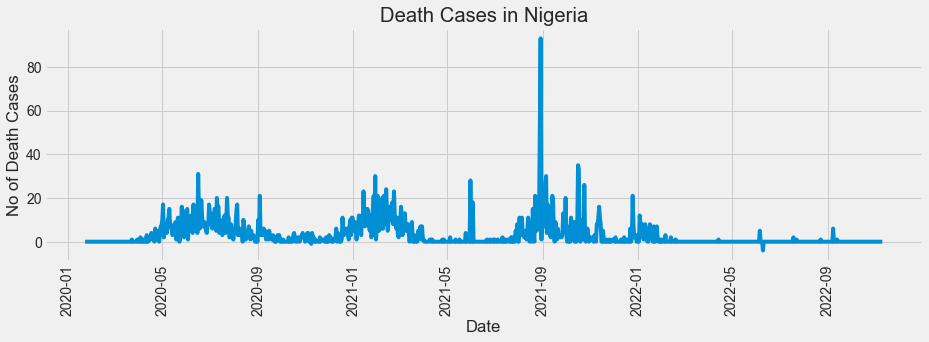

In [27]:
fig = plt.figure(figsize=(14,4))
p = sns.lineplot(data=Death_Cases_in_Nigeria, x='Date', y='Nigeria');
p.set_xlabel('Date')
p.set_ylabel('No of Death Cases')
plt.xticks(rotation = 90);
plt.title('Death Cases in Nigeria')


TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [28]:
No_Confirmed_Cases_in_Nigeria = Confirmed_Cases_in_Nigeria["Nigeria"].diff()
No_Confirmed_Cases_in_Nigeria

1        NaN
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
1019   -54.0
1020     0.0
1021     0.0
1022     0.0
1023     0.0
Name: Nigeria, Length: 1023, dtype: float64

In [29]:
Date_of_Confirmed_Cases_in_Nigeria = Confirmed_Cases_in_Nigeria["Date"]
Date_of_Confirmed_Cases_in_Nigeria

1      2020-01-23
2      2020-01-24
3      2020-01-25
4      2020-01-26
5      2020-01-27
          ...    
1019   2022-11-06
1020   2022-11-07
1021   2022-11-08
1022   2022-11-09
1023   2022-11-10
Name: Date, Length: 1023, dtype: datetime64[ns]

In [30]:
data = pd.concat([Date_of_Confirmed_Cases_in_Nigeria, No_Confirmed_Cases_in_Nigeria],axis=1)
data

,Date,Nigeria
1,2020-01-23,NaN
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0
...,...,...
1019,2022-11-06,-54.0
1020,2022-11-07,0.0
1021,2022-11-08,0.0
1022,2022-11-09,0.0


In [31]:
data.max()


Date       2022-11-10 00:00:00
Nigeria                 6158.0
dtype: object

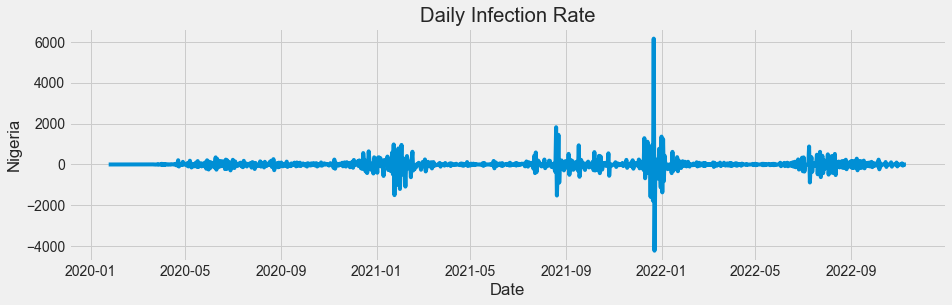

In [32]:
# draw lineplot
fig = plt.figure(figsize=(14,4))
sns.lineplot(x="Date", y="Nigeria", data=data)
plt.title('Daily Infection Rate')
plt.show()


TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [33]:
Confirmed_Cases_in_Nigeria[["Date", "Nigeria"]]['Nigeria'].diff().max()

6158.0

In [34]:
Confirmed_Cases_in_Nigeria[["Date", "Nigeria"]][Confirmed_Cases_in_Nigeria[["Date", "Nigeria"]]['Nigeria'] == 6158.0]

,Date,Nigeria
700,2021-12-22,6158.0


TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [ ]:
df['states'] = df['States Affected']
df.head(10)

In [35]:
Covid_External.head(2)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [ ]:
#Combine the two dataset together on a common column(states)

data = pd.merge(df, Covid_External, on='states')
data.head()

In [ ]:
new_dataframe = pd.merge(df, Covid_External, on='states')
new_dataframe[['States Affected', 'No. of Cases (Lab Confirmed)', 'Overall CCVI Index']].sort_values(by='Overall CCVI Index', ascending=False).head(10)

,States Affected,No. of Cases (Lab Confirmed),Overall CCVI Index
13,Gombe,3313,1.0
31,Yobe,638,1.0
29,Sokoto,822,0.9
30,Jigawa,669,0.9
33,Zamfara,375,0.9
24,Borno,1629,0.9
27,Adamawa,1312,0.8
25,Taraba,1515,0.8
32,Kebbi,480,0.8
23,Bauchi,2028,0.8


In [ ]:
dat=new_dataframe[['States Affected', 'No. of Cases (Lab Confirmed)', 'Overall CCVI Index']].nlargest(10, 'Overall CCVI Index', keep='all')
dat

In [ ]:
fig = plt.figure(figsize=(14,4))
plt.plot(dat['States Affected'], dat['No. of Cases (Lab Confirmed)'], dat['States Affected'], 1000 * dat['Overall CCVI Index'])
plt.legend(['No. of Cases (Lab Confirmed)', 'Overall CCVI Index*10000'])
plt.title('No. of Cases (Lab Confirmed) VS Overall CCVI Index')

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

In [89]:
data

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,104231,1088,102372,771,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,29530,12,29269,249,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,18108,-3,17956,155,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11630,1,11540,89,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10352,0,10150,202,Oyo,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10344,0,10269,75,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7928,0,7606,322,Edo,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Delta,5856,574,5170,112,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
8,Ogun,5810,11,5717,82,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
9,Kano,5386,-1,5260,127,Kano,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

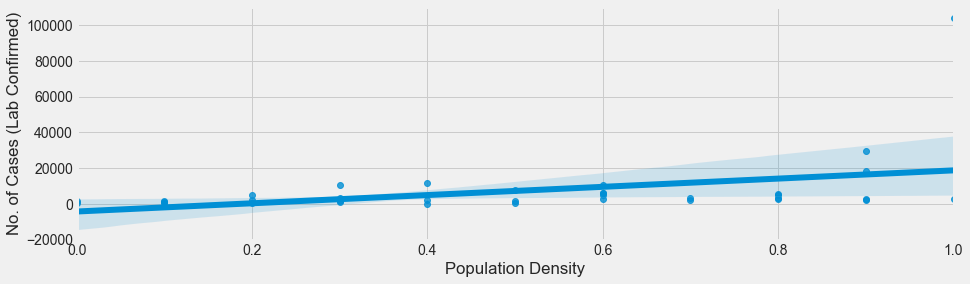

In [90]:
# draw regplot
plt.figure(figsize=(14,4))
sns.regplot(x = "Population Density", 
            y =  "No. of Cases (Lab Confirmed)",
            data = data)


TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [91]:
df.head(2)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,states
0,Lagos,104231,1088,102372,771,Lagos
1,FCT,29530,12,29269,249,FCT


No. of confirmed active case in Nigeria

In [92]:
sum_of_confirmed_case_in_Nigeria = df['No. of Cases (Lab Confirmed)'].sum()
sum_of_confirmed_case_in_Nigeria

266463

No. of cases (on admission) in Nigeria

In [93]:
Total_No_of_Cases = df['No. of Cases (on admission)'].sum()
Total_No_of_Cases
#Total_No_of_Cases(on_admission)

3458

No. of Discharged cases in Nigeria

In [94]:
Total_No_of_Discharged_Cases = df['No. Discharged'].sum()
Total_No_of_Discharged_Cases

259850

No. of Deaths

In [95]:
Total_No_of_Deaths_Cases = df['No. of Deaths'].sum()
Total_No_of_Deaths_Cases

3155

<Figure size 1440x1440 with 0 Axes>

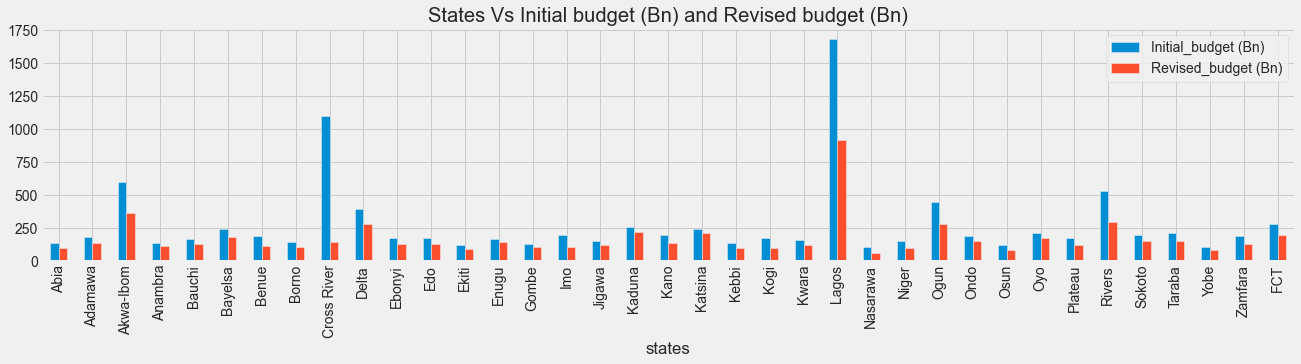

In [118]:
fig = plt.figure(figsize=(20,20))
Budget.plot(x='states', y=['Initial_budget (Bn)', 'Revised_budget (Bn)'], kind="bar", figsize=(20,4))
plt.title('States Vs Initial budget (Bn) and Revised budget (Bn)')
#sns.barplot(x='Day', y='Customers', hue='Time', data=df) 
#sns.barplot(data=Budget, x='states', y=['Initial_budget (Bn)', 'Revised_budget (Bn)']);
plt.xticks(rotation = 90);
#plt.bar(x=Budget['states'], height=Budget['Initial_budget (Bn)'])
#plt.bar(x=Budget['states'], y=[Budget['Initial_budget (Bn)'], Budget['Revised_budget (Bn)'], kind="bar")
#df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar")




### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [98]:
GDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [140]:
# multiple unpivot columns
#pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age'])

new = pd.melt(GDP, id_vars =['Year'], value_vars =['Q1'])
new2 = pd.melt(GDP, id_vars =['Year'], value_vars =['Q2'])
new3 = pd.melt(GDP, id_vars =['Year'], value_vars =['Q3'])
new4 = pd.melt(GDP, id_vars =['Year'], value_vars =['Q4'])
new2

,Year,variable,value
0,2014,Q2,16084622.31
1,2015,Q2,16463341.91
2,2016,Q2,16218542.41
3,2017,Q2,16334719.27
4,2018,Q2,16580508.07
5,2019,Q2,16931434.89
6,2020,Q2,15890000.00


In [153]:
q = new2.iloc[6]['value']

In [154]:
new2.iloc[6]['value']

15890000.0

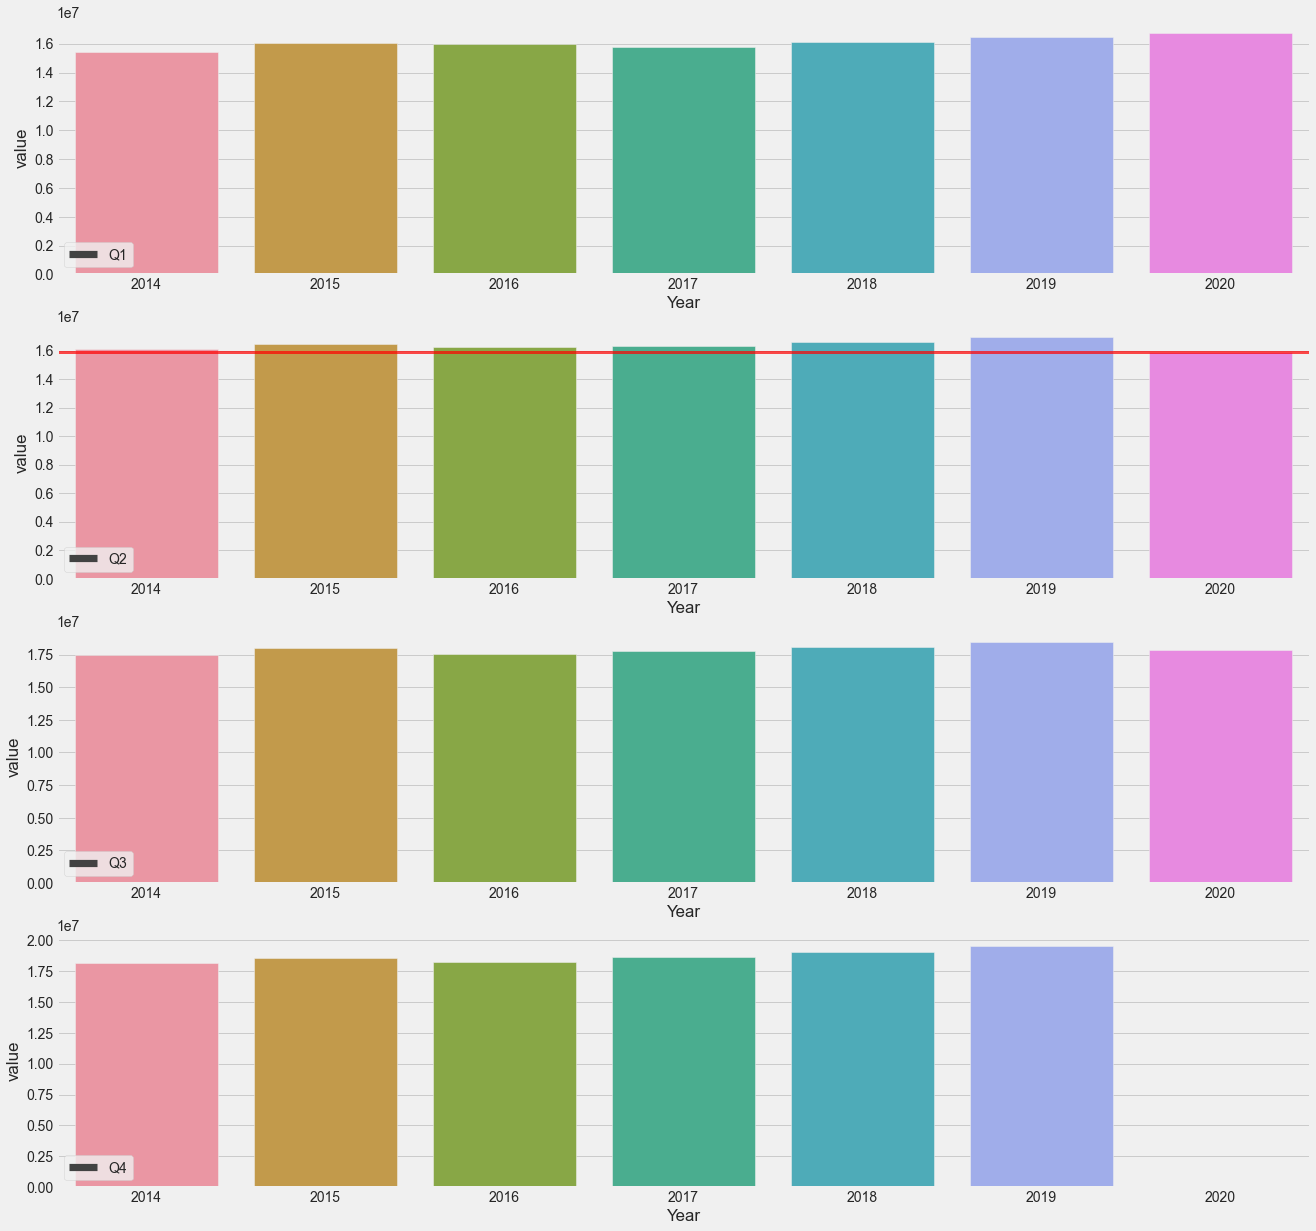

In [157]:
fig, ax = plt.subplots(4, 1, figsize=(20,20))
#ax[0].bar(x=new['Year'], height=new['value'])
sns.barplot(data=new, x='Year', y='value', ax=ax[0]);
ax[0].legend(['Q1'], loc='lower left')


#ax[1].bar(x=new2['Year'], height=new2['value'])
sns.barplot(data=new2, x='Year', y='value', ax=ax[1])
ax[1].legend(['Q2'], loc='lower left')
ax[1].axhline(q, color ='red', lw = 3, alpha = 0.7)


#ax[2].bar(x=new3['Year'], height=new3['value'])
sns.barplot(data=new3, x='Year', y='value', ax=ax[2])
ax[2].legend(['Q3'], loc='lower left')


#ax[3].bar(x=new3['Year'], height=new4['value'])
sns.barplot(data=new4, x='Year', y='value', ax=ax[3])
ax[3].legend(['Q4'], loc='lower left')






### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data